# **Laboratorium ADOM, ćwiczenia 1 i 2 - ZALICZENIE**
---


**Napisz trzy funkcje realizującą rozciąganie histogramu z różnymi sposobami wyznaczania wartości *min*, *max*.** W szczególności każda z funkcji powinna realizować następujące zadania:

- wczytywać obraz wejściowy (zmienna zawierająca obraz) i ew.niezbędne argumenty (patrz poniżej)
- zwracać obraz z rozciągniętym histogramem (macierz numpy, w której znajduje się obraz z rozciągniętym histogramem)

Poszczególne funkcje powinny implementować następujące warianty wyznaczania wartości *min* i *max*:

1. Wartości *min*, *max* zadane przez użytkownika w skali 0...1 (parametry *min* i *max*) - 0,5 pkt
2. Wartości obliczone automatycznie jako najmniejsza (*min*) i największa (*max*) wartość piksela obrazu (brak parametrów) - 1 pkt
3. Wartosci *min* wyznaczone jako wartość *p*-tego kwantyla jasności w obrazie, zaś *max* jako wartość *q*-tego kwantyla (paramtery *p* i *q*). Przykładowo dla *p=0.1* wartość minimalna *min* oznacza taką jasność piksela, że 10% pikseli obrazu ma jasności niższe. Dla *q=0,95* wartość *max* jest taką, że 5% pikseli obrazu ma jasności wyższe. Można wykorzystać `np.quantile` - 1,5 pkt

Funkcje powinny działać na obrazach w skali szarości, opcjonalnie można zrealizować je w wariancie dla obrazów kolorowych. Operacje wczytania z dysku i wyświetlania obrazu powinny znaleźć się w kodzie demonstracyjnym. 


---
Dane studenta:
- nr indeksu: 284982
- imię: Kamil
- nazwisko: Grzegorzewski
---

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import cv2

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

In [70]:
#Wykorzystane funkcje z materiałów udostępnionych na MS Teams w zakładce Pliki
# funkcja wyświetlająca obraz wraz z jego histogramem
def pokazhist(obraz, openCV = True):
    plt.figure(figsize=(10,5), dpi= 80)

    plt.subplot(1,2,1)
    pokaz(obraz, openCV = openCV)
    plt.subplot(1,2,2)
    if obraz.ndim == 3:
        color = ('b','g','r')
        for i,col in enumerate(color):
            histr = cv2.calcHist([obraz],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
        plt.show()
    else:
        histr = cv2.calcHist([obraz],[0],None,[256],[0,256])
        plt.plot(histr)
        plt.xlim([0,256])
        plt.show()    
        
# funkcja wyswietlająca obraz kolorowy lub w skali szarości
def pokaz(im, tytul = "", osie = False, openCV = True):
    if not(osie):
        plt.axis("off") 
    if im.ndim == 2:
        plt.imshow(im,cmap='gray')
    else:
        if openCV:
            plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB));
        else:
            plt.imshow(im)        
    plt.title(tytul)

In [71]:
# kod funkcji 1
# tablica korekcji dla rozciągania histogramu
def lut_rozciag(wmin,wmax):
    wmin = wmin * 255
    wmax = wmax * 255
    
    lut = np.empty((1,256), np.uint8)
    for i in range(256):
        if i<wmin:
            lut[0,i] = 0
        elif i>wmax:
            lut[0,i] = 255
        else:
            lut[0,i] = int(float((i - wmin)*255)/float(wmax - wmin))
            
    obraz_wyjsciowy = cv2.LUT(obraz,lut)
    
    return obraz_wyjsciowy

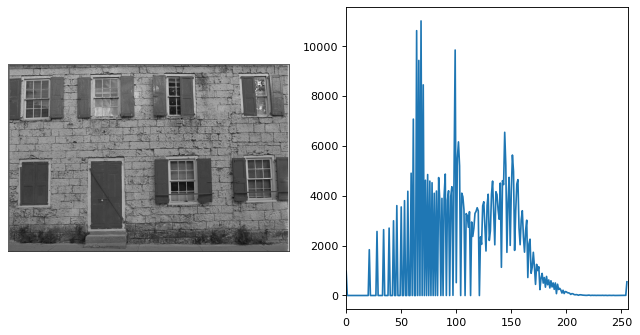

min = 0  , max = 255


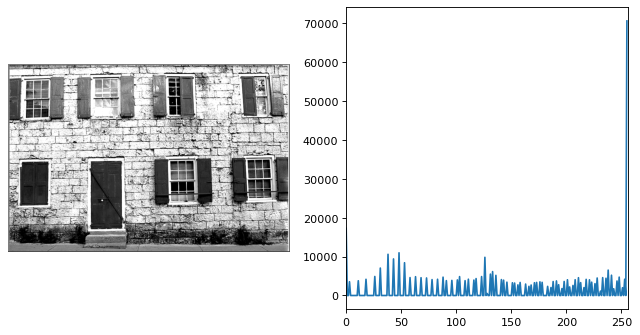

min = 0  , max = 255


In [72]:
# kod demonstacyjny funkcji 1
# Wczytanie obrazu w czarno białym
obraz = cv2.imread('kodim01.png', 0)

pokazhist(obraz)
print('min =',obraz.min()," , max =",obraz.max())

wmin = 0.19
wmax = 0.59

obraz_after = lut_rozciag(wmin,wmax)
pokazhist(obraz_after)
print('min =',obraz_after.min()," , max =",obraz_after.max())

In [73]:
# kod funkcji 2

def lut_rozciag2(obraz):
    wmin = obraz.min()
    wmax = obraz.max()

    lut = np.empty((1,256), np.uint8)
    for i in range(256):
        if i<wmin:
            lut[0,i] = 0
        elif i>wmax:
            lut[0,i] = 255
        else:
            lut[0,i] = int(float((i - wmin)*255)/float(wmax - wmin))
            
    obraz_wyjsciowy = cv2.LUT(obraz,lut)     
    
    return obraz_wyjsciowy

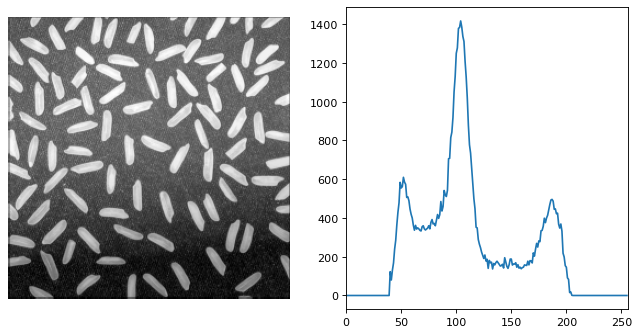

min = 40  , max = 205


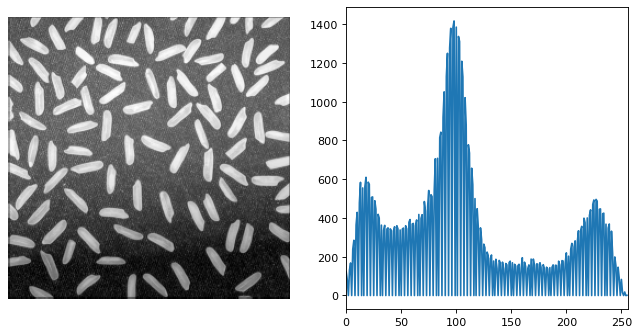

min = 0  , max = 255


In [74]:
# kod demonstacyjny funkcji 2
# Wczytanie obrazu w czarno białym
obraz2 = cv2.imread('rice.tif', 0)


pokazhist(obraz2)
print('min =',obraz2.min()," , max =",obraz2.max())

obraz_after2 = lut_rozciag2(obraz2)

pokazhist(obraz_after2)
print('min =',obraz_after2.min()," , max =",obraz_after2.max())

In [75]:
# kod funkcji 3
def lut_rozciag3(obraz, p, q):
    lut = np.empty((1,256), np.uint8)
    
    wmin = np.quantile(obraz, p)
    wmax = np.quantile(obraz, q)
    
    for i in range(256):
        if i<wmin:
            lut[0,i] = 0
        elif i>wmax:
            lut[0,i] = 255
        else:
            lut[0,i] = int(float((i - wmin)*255)/float(wmax - wmin))
    
    obraz_wyjsciowy = cv2.LUT(obraz,lut)     
    
    return obraz_wyjsciowy

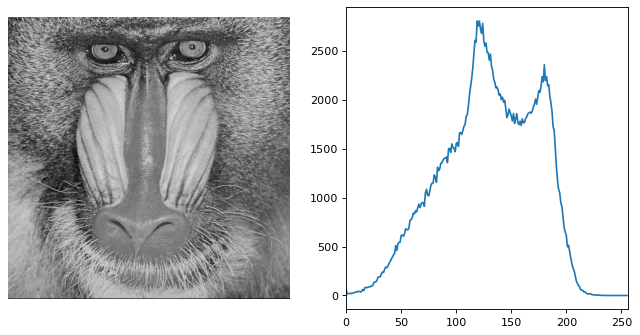

min = 0  , max = 253


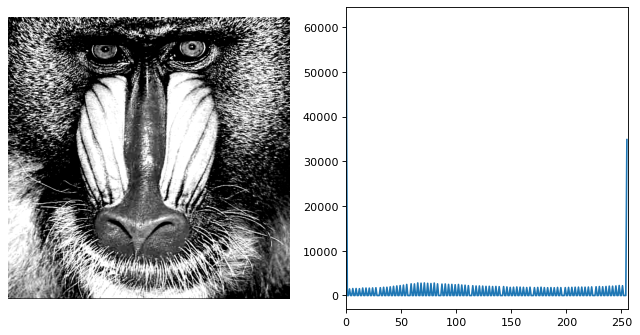

min = 0  , max = 255


In [76]:
# kod demonstacyjny funkcji 3
# Wczytanie obrazu w czarno białym
obraz3 = cv2.imread('baboon.jpg', 0)

pokazhist(obraz3)
print('min =',obraz3.min()," , max =",obraz3.max())

obraz_after3 = lut_rozciag3(obraz3, 0.23, 0.87)

pokazhist(obraz_after3)
print('min =',obraz_after3.min()," , max =",obraz_after3.max())

---
---
Historia zmian:
* wersja r.akad 20/21: 2.11.2020 (MI)
* wersja r.akad 21/22: 27.10.2021 (MI)